## Лабораторная работа 5

### Вариант 10

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from ipywidgets import interact

In [2]:
def Plot(count, points_xy):
    rows = math.ceil(count/3)
    cols = 3 if count > 3 else count
    fig, subplots = plt.subplots(nrows=rows, ncols = cols)
    
    fig.set_figwidth(8 * cols)
    fig.set_figheight(4 * rows)

    colors = sns.color_palette("hls", len(points_xy[0]))

    for i, ax in enumerate(fig.axes):
        if i < count:
            for j, xy in enumerate(points_xy[i][:-1]):
                try:
                    lbl = xy[2]
                except:
                    lbl = '.'
                ax.plot(xy[0], xy[1], color = colors[j], label = lbl)
                ax.legend()
            ax.set_title(points_xy[i][-1])
    plt.subplots_adjust(hspace=0.5)

#TRIDIAGONAL_MATRIX_ALGORITHM
class Tridiagonal_Matrix_Algorithm:
    def __init__(self, A, _d):
        self.n = len(_d)
        self.a = []
        self.b = []
        self.c = []
        self.d = _d
        self.A = A

        self.a.append(0);
        self.b.append(self.A[0][0])
        self.c.append(self.A[0][1])
        for i in range(1, self.n - 1):
            self.a.append(self.A[i][i - 1])
            self.b.append(self.A[i][i])
            self.c.append(self.A[i][i + 1])

        self.a.append(self.A[self.n - 1][self.n - 2])
        self.b.append(self.A[self.n - 1][self.n - 1])
        self.c.append(0)

        self.Make_P_andQ()
        self.x = self.Make_x()

    def Ans(self):
        return self.x

    def Make_P_andQ(self):
        self.p = []
        self.q = []
        self.p.append(- self.c[0] / self.b[0])
        self.q.append(self.d[0] / self.b[0])

        for i in range(1, self.n - 1):
           self.p.append(- self.c[i] / (self.b[i] + self.a[i] * self.p[i - 1]))
           self.q.append((self.d[i] - self.a[i] * self.q[i - 1]) / (self.b[i] + self.a[i] * self.p[i - 1]))

    def Make_x(self):
        self.ans = np.zeros(self.n)

        self.ans[self.n - 1] = (self.d[self.n - 1] - self.a[self.n - 1] * self.q[self.n - 2]) / (self.b[self.n - 1] + self.a[self.n - 1] * self.p[self.n - 2]);

        for i in range(self.n - 2, -1, -1):
            self.ans[i] = self.p[i] * self.ans[i + 1] + self.q[i]

        return self.ans.tolist()

<!-- вар 9
$$
\frac{\partial{u}}{\partial{t}} =  a \frac{\partial^2{u}}{\partial{x^2}} + b \frac{\partial{u}}{\partial{x}}$$
$$  a > 0, b > 0 $$
$$ u_x(0, t) - u(0, t) = - exp(-at)(cos(bt) + sin(bt)) $$
$$ u_x(\pi, t) - u(\pi, t) = exp(-at)(cos(bt) + sin(bt)) $$
$$ u(x, 0) = cos(x) $$

$$ Аналитическое \  решение: U(x, t) = exp(-at)cos(x + bt) $$ -->

вар 10 
$$
\frac{\partial{u}}{\partial{t}} =  a \frac{\partial^2{u}}{\partial{x^2}} + b \frac{\partial{u}}{\partial{x}} + cu$$
$$  a > 0, b > 0, c < 0 $$
$$ u_x(0, t) + u(0, t) = exp((c-a)t)(cos(bt) + sin(bt)) $$
$$ u_x(\pi, t) + u(\pi, t) = -exp((c-a)t)(cos(bt) + sin(bt)) $$
$$ u(x, 0) = sin(x) $$

$$ Аналитическое \  решение: U(x, t) = exp((c-a)t)sin(x + bt) $$

In [3]:
a = 1
b = 1
c = -1
f = lambda x, t : 0


# U = lambda x, t: math.exp(a*t) * math.cos(x + b * t)
U = lambda x, t: math.exp((c - a)*t) * math.sin(x + b * t)
# U = lambda x, t: math.exp(-(math.pi)**2 * t * a) * math.sin(math.pi * x)

alph_0 = 1
beta_0 = 1

alph_l = 1
beta_l = 1


# gamma_0 = lambda t: - math.exp(- a * t) * (math.cos(b * t) + math.sin(b * t))
# gamma_l = lambda t: math.exp(- a * t) * (math.cos(b * t) + math.sin(b * t))
gamma_0 = lambda t: math.exp((c - a) * t) * (math.cos(b * t) + math.sin(b * t))
gamma_l = lambda t: - math.exp((c - a) * t) * (math.cos(b * t) + math.sin(b * t))
# gamma_0 = lambda t: 0
# gamma_l = lambda t: 0


# u_0 = lambda x: math.cos(x)
u_0 = lambda x: math.sin(x)
# u_0 = lambda x: math.sin( math.pi * x)


# 2Т1П


\
$$ \alpha_0 * \frac{u_1^{k + 1} - u_0^{k + 1}}{h} + \beta_0 * u_0^{k + 1}  = \gamma_0(t^{k + 1})$$
$$ \alpha_l * \frac{u_n^{k + 1} - u_{n-1}^{k + 1}}{h} + \beta_l * u_n^{k + 1}  = \gamma_l(t^{k + 1})$$
\


### Явный

$$ u_0^{k + 1} = \frac{h * \gamma_0(t^{k + 1}) - \alpha_0 * u_1^{k + 1}}{h * \beta_0 - \alpha_0}  $$

$$  u_i^{k + 1} = \frac{a \tau}{h^2} (u_{i-1}^k - 2 u_{i}^k + u_{i+1}^k) + \frac{b \tau}{2h}(u_{i+1}^k - u_{i-1}^k) + \tau c u_{i}^k + \tau f + u_{i}^k$$

$$ u_n^{k + 1} = \frac{h * \gamma_l(t^{k + 1}) + \alpha_l * u_{n - 1}^{k + 1}}{h * \beta_l + \alpha_l}   $$


### Неявный

$$  u_0^{k + 1} * (\frac{- \alpha_0}{h} + \beta_0) + u_1^{k + 1} * (\frac{\alpha_0}{h}) = \gamma_0(t^{k + 1})$$

$$ u_{i-1}^{k+1} * (\frac{a\tau}{h^2} - \frac{b\tau}{2h}) + u_{i}^{k+1} * (-1 - \frac{2a\tau}{h^2} + c\tau) + u_{i}^{k+1} * (\frac{a\tau}{h^2} + \frac{b\tau}{2h}) = - u_i^k$$

$$  u_{n - 1}^{k + 1} * (\frac{- \alpha_l}{h}) + u_n^{k + 1} * (\frac{\alpha_l}{h} + \beta_l) = \gamma_l(t^{k + 1})$$

### Комбинированный

$$  u_0^{k + 1} * (\frac{- \alpha_0}{h} + \beta_0) + u_1^{k + 1} * (\frac{\alpha_0}{h}) = \gamma_0(t^{k + 1})$$

$$ u_{i-1}^{k+1} * (\frac{a\tau \theta}{h^2} - \frac{b\tau\theta}{2h}) + u_{i}^{k+1} * (-1 - \frac{2a\tau\theta}{h^2} + c\tau\theta) + u_{i}^{k+1} * (\frac{a\tau\theta}{h^2} + \frac{b\tau\theta}{2h}) = - u_i^k - \theta \tau f(x, t^{k + 1}) - \tau(1 - \theta)(a * \frac{u_{i-1}^k - 2 u_i^k + u_{i + 1} ^ k}{h^2} + b * \frac{u_{i+1}^k - u_{i - 1}^k}{2h} + cu_i^k + f(x, t^k))  $$

$$  u_{n - 1}^{k + 1} * (\frac{- \alpha_l}{h}) + u_n^{k + 1} * (\frac{\alpha_l}{h} + \beta_l) = \gamma_l(t^{k + 1})$$

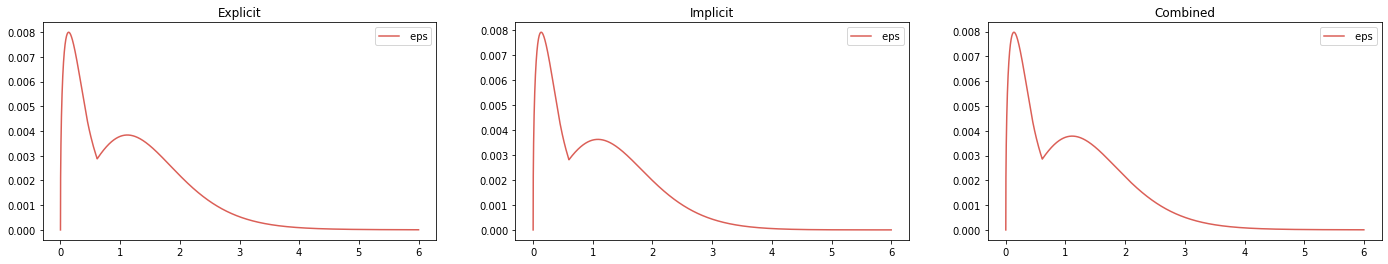

In [4]:
class Two_point_first_order:
    def __init__(self, a, b, c, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau
            _u = np.zeros(len(u))
            u_k = _U[-1]
            for i in range(1, len(_u) - 1):
                _u[i] = (a * tau / h**2) * (u_k[i-1] - 2 * u_k[i] + u_k[i+1]) + (b * tau / (2 * h)) * (u_k[i+1] - u_k[i-1]) + tau * c * u_k[i] + u_k[i]   
            _u[0] = (h * gamma_0(t) - alph_0 * _u[1]) / (h * beta_0 - alph_0)
            _u[-1] = (h * gamma_l(t) + alph_l * _u[-2]) / (h * beta_l + alph_l)
            _U.append(_u)

        return _U
    
    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = -alph_0 /  h + beta_0
            A[0][1] = alph_0 / h
            d[0] = gamma_0(t)
            
            A[-1][-2] = - alph_l /  h
            A[-1][-1] = alph_l / h  + beta_l
            d[-1] = gamma_l(t)

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau / h**2 - b * tau / (2*h)
                row[i + 1] = -1 - 2*a*tau / h**2 + c * tau 
                row[i + 2] = a * tau / h**2 + b * tau / (2*h)
                i += 1

                d[i] = -_U[-1][i]
                
            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Combined(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = -alph_0 /  h + beta_0
            A[0][1] = alph_0 / h
            d[0] = gamma_0(t)
            
            A[-1][-2] = - alph_l /  h
            A[-1][-1] = alph_l / h  + beta_l
            d[-1] = gamma_l(t)

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau * theta / h**2 - b * tau * theta / (2*h)
                row[i + 1] = -1 - 2 * a * tau * theta / h**2 + c * tau * theta 
                row[i + 2] = a * tau * theta / h**2 + b * tau * theta / (2*h)
                i += 1

                d[i] = -_U[-1][i] - tau * (1 - theta) * ((_U[-1][i - 1] - 2 * _U[-1][i] + _U[-1][i + 1])/ h**2 + (_U[-1][i + 1] - _U[-1][i - 1]) / (2 * h) + c * _U[-1][i])
                
            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U

    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps


met_2T1P = Two_point_first_order(a, b, c, f)

ex_U21_appr = met_2T1P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6, n = 100)
ex_U21_real = met_2T1P.Get_real_vals(U, ex_U21_appr)
ex_eps21 = met_2T1P.Get_epx(ex_U21_appr, ex_U21_real)

im_U21_appr = met_2T1P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6, n = 100)
im_U21_real = met_2T1P.Get_real_vals(U, im_U21_appr)
im_eps21 = met_2T1P.Get_epx(im_U21_appr, im_U21_real)

cmb_U21_appr = met_2T1P.Combined(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta = 1/4, T = 6, n = 100)
cmb_U21_real = met_2T1P.Get_real_vals(U, cmb_U21_appr)
cmb_eps21 = met_2T1P.Get_epx(cmb_U21_appr, cmb_U21_real)

data = []  
data.append([[[met_2T1P.tau * i for i in range(len(ex_U21_appr))], ex_eps21, f' eps'], f'Explicit'])
data.append([[[met_2T1P.tau * i for i in range(len(im_U21_appr))], im_eps21, f' eps'], f'Implicit'])
data.append([[[met_2T1P.tau * i for i in range(len(cmb_U21_appr))], cmb_eps21, f' eps'], f'Combined'])

Plot(len(data), data)

In [5]:
%matplotlib inline

U_real = [ex_U21_real, im_U21_real, cmb_U21_real]
U_appr = [ex_U21_appr, im_U21_appr, cmb_U21_appr]

def plot_met_2_1(i=0):
    fig, subplots = plt.subplots(nrows=1, ncols = 3)
    fig.set_figwidth(8 * 3)
    fig.set_figheight(5)

    labls = ['явный', 'неявный', 'комбинированный']

    for j in range(3 if len(U_real) > 3 else len(U_real)):
        fig.axes[j].plot(met_2T1P.x, U_real[j][i], 'g', label = 'real');
        fig.axes[j].plot(met_2T1P.x, U_appr[j][i], '.', 'b', label = '2Т1П ');
        fig.axes[j].set_title(f"{labls[j]} \n  t = {met_2T1P.tau * i}")
        fig.axes[j].legend()


    plt.show();
    
interact(plot_met_2_1, i = (0, len(U_appr[0]) - 100, 1));

interactive(children=(IntSlider(value=0, description='i', max=24219), Output()), _dom_classes=('widget-interac…

# 3T2П

$$ \alpha_0 * \frac{-3u_0^{k + 1} + 4u_1^{k + 1} - u_2^{k+1}}{2h} + \beta_0 * u_0^{k + 1}  = \gamma_0(t^{k + 1})$$
$$ \alpha_l * \frac{u_{n - 2}^{k+1} - 4u_{n - 1}^{k + 1} + 3u_n^{k+1}}{2h} + \beta_l * u_n^{k + 1}  = \gamma_l(t^{k + 1})$$

### Явный 

$$ u_0^{k + 1} = \frac{2 h \gamma_0(t^{k + 1}) + \alpha_0 (u_2^{k + 1} - 4 u_1^{k + 1}) }{2 h \beta_0 - 3 \alpha_0} $$

$$  u_i^{k + 1} = \frac{a \tau}{h^2} (u_{i-1}^k - 2 u_{i}^k + u_{i+1}^k) + \frac{b \tau}{2h}(u_{i+1}^k - u_{i-1}^k) + \tau c u_{i}^k + \tau f + u_{i}^k$$

$$ u_n^{k + 1} = \frac{2 h \gamma_l(t^{k+1}) + \alpha_l (4 u_{n - 1}^{k + 1} - u_{n - 2}^{k + 1}) }{2 h \beta_l + 3 \alpha_l} $$

### Неявный


$$  u_0^{k + 1} * (\frac{- 3\alpha_0}{2h} + \beta_0) + u_1^{k + 1} * (\frac{4 \alpha_0}{2 h}) +  u_2^{k + 1} * (\frac{-\alpha_0}{2h}) = \gamma_0(t^{k + 1})$$

$$ u_{i-1}^{k+1} * (\frac{a\tau}{h^2} - \frac{b\tau}{2h}) + u_{i}^{k+1} * (-1 - \frac{2a\tau}{h^2} + c \tau) + u_{i}^{k+1} * (\frac{a\tau}{h^2} + \frac{b\tau}{2h}) = - u_i^k$$

$$  u_{n - 2}^{k + 1} * (\frac{\alpha_l}{2h} ) + u_{n - 1}^{k + 1} * (\frac{- 4 \alpha_l}{2 h}) + u_n^{k + 1} * (\frac{3\alpha_l}{2h} + \beta_l) = \gamma_l(t^{k + 1})$$

### Комбинированный

$$  u_0^{k + 1} * (\frac{- 3\alpha_0}{2h} + \beta_0) + u_1^{k + 1} * (\frac{4 \alpha_0}{2 h}) +  u_2^{k + 1} * (\frac{-\alpha_0}{2h}) = \gamma_0(t^{k + 1})$$

$$ u_{i-1}^{k+1} * (\frac{a\tau \theta}{h^2} - \frac{b\tau\theta}{2h}) + u_{i}^{k+1} * (-1 - \frac{2a\tau\theta}{h^2} + c\tau\theta) + u_{i}^{k+1} * (\frac{a\tau\theta}{h^2} + \frac{b\tau\theta}{2h}) = - u_i^k - \theta \tau f(x, t^{k + 1}) - \tau(1 - \theta)(a * \frac{u_{i-1}^k - 2 u_i^k + u_{i + 1} ^ k}{h^2} + b * \frac{u_{i+1}^k - u_{i - 1}^k}{2h} + cu_i^k + f(x, t^k))  $$

$$  u_{n - 2}^{k + 1} * (\frac{\alpha_l}{2h} ) + u_{n - 1}^{k + 1} * (\frac{- 4 \alpha_l}{2 h}) + u_n^{k + 1} * (\frac{3\alpha_l}{2h} + \beta_l) = \gamma_l(t^{k + 1})$$

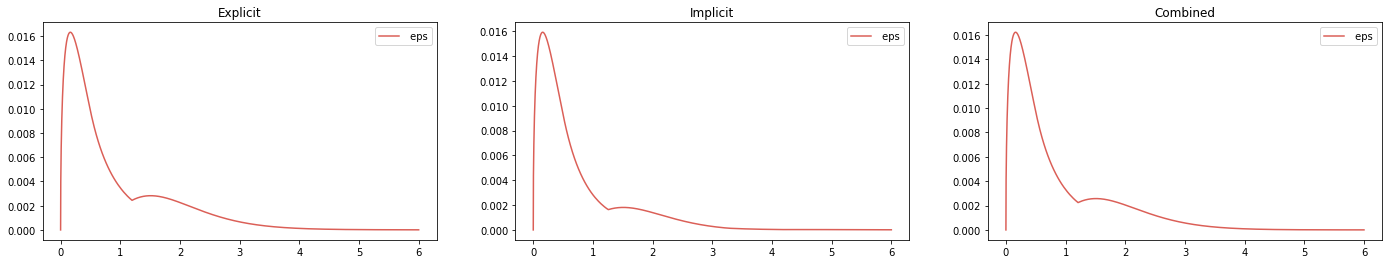

In [6]:
class Three_point_second_order:
    def __init__(self, a, b, c, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau
            _u = np.zeros(len(u))
            u_k = _U[-1]
            for i in range(1, len(_u) - 1):
                _u[i] = (a * tau / h**2) * (u_k[i-1] - 2 * u_k[i] + u_k[i+1]) + (b * tau / (2 * h)) * (u_k[i+1] - u_k[i-1]) + tau * c * u_k[i] + u_k[i]   
            _u[0] = (2 * h * gamma_0(t) + alph_0 * (_u[2] - 4 * _u[1])) / (2 * h * beta_0 - 3 * alph_0)
            _u[-1] = (2 * h * gamma_l(t) + alph_l * (4 * _u[-2] - _u[-3])) / (2 * h * beta_l + 3 * alph_l)
            _U.append(_u)

        return _U
    
    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = -3 * alph_0 / (2*h) + beta_0
            A[0][1] = 4 * alph_0 / (2 * h)
            A[0][2] = -alph_0 / (2 * h)
            d[0] = gamma_0(t)

            A[-1][-3] = alph_l / (2 * h)
            A[-1][-2] = -4 * alph_l / (2 * h)
            A[-1][-1] = 3 * alph_l / (2*h) + beta_l
            d[-1] = gamma_l(t)

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau / h**2 - b * tau / (2*h)
                row[i + 1] = -1 - 2*a*tau / h**2 + c* tau
                row[i + 2] = a * tau / h**2 + b * tau / (2*h)
                i += 1
                d[i] = -_U[-1][i]
            

            cf1 = A[0][2] / A[1][2]
            A[0] = A[0] - A[1] * cf1 
            d[0] = d[0] - d[1] * cf1

            
            cf2 = A[-1][-3] / A[-2][-3]
            A[-1] = A[-1] - A[-2] * cf2
            d[-1] = d[-1] - d[-2] * cf2

            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Combined(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = -3 * alph_0 / (2*h) + beta_0
            A[0][1] = 4 * alph_0 / (2 * h)
            A[0][2] = -alph_0 / (2 * h)
            d[0] = gamma_0(t)

            A[-1][-3] = alph_l / (2 * h)
            A[-1][-2] = -4 * alph_l / (2 * h)
            A[-1][-1] = 3 * alph_l / (2*h) + beta_l
            d[-1] = gamma_l(t)

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau * theta / h**2 - b * tau * theta / (2*h)
                row[i + 1] = -1 - 2 * a * tau * theta / h**2 + c * tau * theta 
                row[i + 2] = a * tau * theta / h**2 + b * tau * theta / (2*h)
                i += 1

                d[i] = -_U[-1][i] - tau * (1 - theta) * ((_U[-1][i - 1] - 2 * _U[-1][i] + _U[-1][i + 1])/ h**2 + (_U[-1][i + 1] - _U[-1][i - 1]) / (2 * h) + c * _U[-1][i])
                

            cf1 = A[0][2] / A[1][2]
            A[0] = A[0] - A[1] * cf1 
            d[0] = d[0] - d[1] * cf1

            
            cf2 = A[-1][-3] / A[-2][-3]
            A[-1] = A[-1] - A[-2] * cf2
            d[-1] = d[-1] - d[-2] * cf2

            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U

    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps


met_3T2P = Three_point_second_order(a, b, c, f)

ex_U32_appr = met_3T2P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6)
ex_U32_real = met_3T2P.Get_real_vals(U, ex_U32_appr)
ex_eps32 = met_3T2P.Get_epx(ex_U32_appr, ex_U32_real)

im_U32_appr = met_3T2P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6)
im_U32_real = met_3T2P.Get_real_vals(U, im_U32_appr)
im_eps32 = met_3T2P.Get_epx(im_U32_appr, im_U32_real)

cmb_U32_appr = met_3T2P.Combined(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta = 1/4, T = 6)
cmb_U32_real = met_3T2P.Get_real_vals(U, cmb_U32_appr)
cmb_eps32 = met_3T2P.Get_epx(cmb_U32_appr, cmb_U32_real)


data = []  
data.append([[[met_3T2P.tau * i for i in range(len(ex_U32_appr))], ex_eps32, f' eps'], f'Explicit'])
data.append([[[met_3T2P.tau * i for i in range(len(im_U32_appr))], im_eps32, f' eps'], f'Implicit'])
data.append([[[met_3T2P.tau * i for i in range(len(cmb_U32_appr))], cmb_eps32, f' eps'], f'Combined'])

Plot(len(data), data)

In [7]:
%matplotlib inline

U_real = [ex_U32_real, im_U32_real, cmb_U32_real]
U_appr = [ex_U32_appr, im_U32_appr, cmb_U32_appr]

def plot_met_3_2(i=0):
    fig, subplots = plt.subplots(nrows=1, ncols = 3)
    fig.set_figwidth(8 * 3)
    fig.set_figheight(5)

    labls = ['явный', 'неявный', 'комбинированный']

    for j in range(3 if len(U_real) > 3 else len(U_real)):
        fig.axes[j].plot(met_3T2P.x, U_real[j][i], 'g', label = 'real');
        fig.axes[j].plot(met_3T2P.x, U_appr[j][i], 'b', label = '3Т2П ');
        fig.axes[j].set_title(f"{labls[j]} \n t = {met_3T2P.tau * i}")
        fig.axes[j].legend()


    plt.show();
    
interact(plot_met_3_2, i = (0, len(U_appr[0]) - 100, 1));

interactive(children=(IntSlider(value=0, description='i', max=5981), Output()), _dom_classes=('widget-interact…

# 2Т2П

$$  u_1^{k + 1} = u_0^{k + 1} + u'_x(0, t ^{k + 1}) * h + ( \frac{1}{a} * u'_t(0, t ^{k + 1}) - \frac{b}{a}u'_x(0, t ^{k + 1}) - \frac{c}{a}u_0^{k + 1} - \frac{f(0, t^{k + 1})}{a} ) * \frac{h^2}{2} $$  
  
$$ u'_t(0, t ^{k + 1}) = \frac{u_0^{k + 1} - u_0^k}{\tau} $$  
  
##### $$ u'_x(0, t ^{k + 1}) * (\frac{h^2 b}{2a} - h) = u_0^{k + 1} * (1 - \frac{h^2 c}{2a} + \frac{h^2}{2\tau a}) + u_0^{k} * (\frac{- h^2}{2 \tau a}) + \frac{- f h^2}{2a} - u_1^{k+1}$$  
  
$$ u'_x(0, t ^{k + 1}) * A_3 = u_0^{k + 1} * A_0 + u_0^{k} * A_1 + A_2 - u_1^{k+1}$$  
  
.  
  
$$  u_{n - 1}^{k + 1} = u_n^{k + 1} + u'_x(l, t ^{k + 1}) *(- h) + ( \frac{1}{a} * u'_t(l, t ^{k + 1}) - \frac{b}{a}u'_x(l, t ^{k + 1}) - \frac{c}{a}u_n^{k + 1} - \frac{f(l, t^{k + 1})}{a} ) * \frac{h^2}{2} $$  
  
$$ u'_t(l, t ^{k + 1}) = \frac{u_n^{k + 1} - u_n^k}{\tau} $$ 

##### $$ u'_x(l, t ^{k + 1}) * (\frac{h^2 b}{2a} + h) = u_n^{k + 1} * (1 - \frac{h^2 c}{2a} + \frac{h^2}{2\tau a}) + u_n^{k} * (\frac{- h^2}{2 \tau a}) + \frac{- f h^2}{2a} - u_{n - 1}^{k+1}$$  

$$ u'_x(l, t ^{k + 1}) * B_3 = u_n^{k + 1} * B_0 + u_n^{k} * B_1 + B_2 - u_{n - 1}^{k+1}$$  

#### $$ u'_x(0, t ^{k + 1}) = \frac{ u_0^{k + 1} A_0 + u_0^{k} A_1 + A_2 - u_1^{k+1} } {A_3} $$
#### $$ u'_x(l, t ^{k + 1}) = \frac{ u_n^{k + 1} B_0 + u_n^{k} B_1 + B_2 - u_{n - 1}^{k+1} } {B_3}$$

### Явный 

$$ u_0^{k + 1} = \frac{\gamma_0(t^{k + 1}) A_3 + \alpha_0 u_1^{k + 1} - \alpha_0(A_1 u_0^k + A_2) }{A_3 \beta_0 - \alpha_0 A_0} $$

$$  u_i^{k + 1} = \frac{a \tau}{h^2} (u_{i-1}^k - 2 u_{i}^k + u_{i+1}^k) + \frac{b \tau}{2h}(u_{i+1}^k - u_{i-1}^k) + \tau c u_{i}^k + \tau f + u_{i}^k$$

$$ u_0^{k + 1} = \frac{\gamma_l(t^{k + 1}) B_3 + \alpha_l u_{n - 1}^{k + 1} - \alpha_l(B_1 u_0^k + B_2) }{B_3 \beta_l - \alpha_l B_0} $$

### Неявный 

$$ u_0^{k + 1} * (\frac{\alpha_0 A_0}{A_3} + \beta_0) + u_1^{k + 1} * (\frac{-\alpha_0}{A_3}) +  = \gamma_0(t^{k + 1}) - \frac{\alpha_0 (A_1 u_0^k + A_2)}{A_3}$$

$$ u_{i-1}^{k+1} * (\frac{a\tau \theta}{h^2} - \frac{b\tau\theta}{2h}) + u_{i}^{k+1} * (-1 - \frac{2a\tau\theta}{h^2} + c\tau\theta) + u_{i}^{k+1} * (\frac{a\tau\theta}{h^2} + \frac{b\tau\theta}{2h}) = - u_i^k - \theta \tau f(x, t^{k + 1}) - \tau(1 - \theta)(a * \frac{u_{i-1}^k - 2 u_i^k + u_{i + 1} ^ k}{h^2} + b * \frac{u_{i+1}^k - u_{i - 1}^k}{2h} + cu_i^k + f(x, t^k))  $$

$$ u_{n - 1}^{k + 1} * (\frac{- \alpha_l}{B_3}) + u_n^{k + 1} * (\frac{\alpha_l B_0}{B_3} + \beta_l) = \gamma_l(t^{k + 1}) - \frac{\alpha_l (B_1 u_n^k + B_2)}{B_3}$$

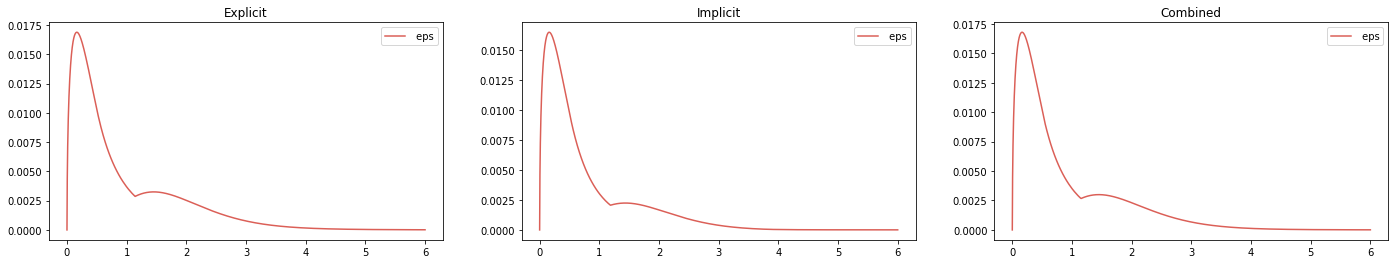

In [ ]:
class Two_point_second_order:
    def __init__(self, a, b, c, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0

        A0 = 1 - h**2 * c / (2 * a) + h**2 / (2 * tau * a)
        A1 = - h**2 / (2 * tau * a)
        A2 = 0
        A3 = h**2 * b / (2 * a) - h

        B0 = A0
        B1 = A1
        B2 = 0
        B3 = h**2 * b / (2 * a) + h

        while (t < T):
            t += tau
            _u = np.zeros(len(u))
            u_k = _U[-1]
            for i in range(1, len(_u) - 1):
                _u[i] = (a * tau / h**2) * (u_k[i-1] - 2 * u_k[i] + u_k[i+1]) + (b * tau / (2 * h)) * (u_k[i+1] - u_k[i-1]) + tau * c * u_k[i] + u_k[i]   
            _u[0] = (gamma_0(t) * A3 + alph_0 * _u[1] - alph_0 * (A1 * _U[-1][0] + A2) ) / (A3 * beta_0 + alph_0 * A0)
            _u[-1] = (gamma_l(t) * B3 + alph_l * _u[-2] - alph_l * (B1 * _U[-1][-1] + B2) ) / (B3 * beta_l + alph_l * B0)
            _U.append(_u)

        return _U
    
    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0

        A0 = 1 - h**2 * c / (2 * a) + h**2 / (2 * tau * a)
        A1 = - h**2 / (2 * tau * a)
        A2 = 0
        A3 = h**2 * b / (2 * a) - h

        B0 = A0
        B1 = A1
        B2 = 0
        B3 = h**2 * b / (2 * a) + h

        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = alph_0 * A0 / A3 + beta_0
            A[0][1] = - alph_0 / A3
            d[0] = gamma_0(t) - alph_0 * (A1 * _U[-1][0] + A2) / A3
            
            A[-1][-2] = - alph_l /  B3
            A[-1][-1] = alph_l * B0 / B3 + beta_l
            d[-1] = gamma_l(t) - alph_l * (B1 * _U[-1][-1] + B2) / B3

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau / h**2 - b * tau / (2*h)
                row[i + 1] = -1 - 2*a*tau / h**2 + c * tau 
                row[i + 2] = a * tau / h**2 + b * tau / (2*h)
                i += 1

                d[i] = -_U[-1][i]
                
            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Combined(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta, T = 4, l = math.pi, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / a
        self.tau = tau
        x = np.arange(0, math.pi, h)
        self.x = x

        u = [u_0(x) for x in x]
        _U = [u]
        t = 0

        A0 = 1 - h**2 * c / (2 * a) + h**2 / (2 * tau * a)
        A1 = - h**2 / (2 * tau * a)
        A2 = 0
        A3 = h**2 * b / (2 * a) - h

        B0 = A0
        B1 = A1
        B2 = 0
        B3 = h**2 * b / (2 * a) + h

        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            A[0][0] = alph_0 * A0 / A3 + beta_0
            A[0][1] = - alph_0 / A3
            d[0] = gamma_0(t) - alph_0 * (A1 * _U[-1][0] + A2) / A3
            
            A[-1][-2] = - alph_l /  B3
            A[-1][-1] = alph_l * B0 / B3 + beta_l
            d[-1] = gamma_l(t) - alph_l * (B1 * _U[-1][-1] + B2) / B3

            i = 0
            for row in A[1:-1]:
                row[i] = a * tau * theta / h**2 - b * tau * theta / (2*h)
                row[i + 1] = -1 - 2 * a * tau * theta / h**2 + c * tau * theta 
                row[i + 2] = a * tau * theta / h**2 + b * tau * theta / (2*h)
                i += 1

                d[i] = -_U[-1][i] - tau * (1 - theta) * ((_U[-1][i - 1] - 2 * _U[-1][i] + _U[-1][i + 1])/ h**2 + (_U[-1][i + 1] - _U[-1][i - 1]) / (2 * h) + c * _U[-1][i])
                
            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U

    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps

met_2T2P = Two_point_second_order(a, b, c, f)

ex_U22_appr = met_2T2P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6)
ex_U22_real = met_2T2P.Get_real_vals(U, ex_U22_appr)
ex_eps22 = met_2T2P.Get_epx(ex_U22_appr, ex_U22_real)

im_U22_appr = met_2T2P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, T = 6)
im_U22_real = met_2T2P.Get_real_vals(U, im_U22_appr)
im_eps22 = met_2T2P.Get_epx(im_U22_appr, im_U22_real)

cmb_U22_appr = met_2T2P.Combined(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, u_0, theta = 1/4, T = 6)
cmb_U22_real = met_2T2P.Get_real_vals(U, cmb_U22_appr)
cmb_eps22 = met_2T2P.Get_epx(cmb_U22_appr, cmb_U22_real)


data = []  
data.append([[[met_2T2P.tau * i for i in range(len(ex_U22_appr))], ex_eps22, f' eps'], f'Explicit'])
data.append([[[met_2T2P.tau * i for i in range(len(im_U22_appr))], im_eps22, f' eps'], f'Implicit'])
data.append([[[met_2T2P.tau * i for i in range(len(im_U22_appr))], cmb_eps22, f' eps'], f'Combined'])

Plot(len(data), data)

In [ ]:
%matplotlib inline

U_real = [ex_U22_real, im_U22_real, cmb_U22_real]
U_appr = [ex_U22_appr, im_U22_appr, cmb_U22_appr]
def plot_met_2_2(i=0):
    fig, subplots = plt.subplots(nrows=1, ncols = 3)
    fig.set_figwidth(8 * 3)
    fig.set_figheight(5)

    labls = ['явный', 'неявный', 'комбинированный']

    for j in range(3 if len(U_real) > 3 else len(U_real)):
        fig.axes[j].plot(met_2T2P.x, U_real[j][i], 'g', label = 'real');
        fig.axes[j].plot(met_2T2P.x, U_appr[j][i], 'b', label = '2Т2П ');
        fig.axes[j].set_title(f"{labls[j]} \n t = {met_2T2P.tau * i}")
        fig.axes[j].legend()


    plt.show();
    
interact(plot_met_2_2, i = (0, len(U_appr[0]) - 100, 1));

interactive(children=(IntSlider(value=0, description='i', max=5981), Output()), _dom_classes=('widget-interact…